In [1]:
# 맥북 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 맥북에서 사용 가능한 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # 또는 'Malgun Gothic', 'NanumGothic' 등
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

print("맥북 한글 폰트 설정 완료!")
print("사용 중인 폰트:", plt.rcParams['font.family'])

# 사용 가능한 한글 폰트 목록 확인 (선택사항)
korean_fonts = []
for font in fm.fontManager.ttflist:
    if 'Korean' in font.name or 'Apple' in font.name or 'Gothic' in font.name:
        korean_fonts.append(font.name)

print(f"\n사용 가능한 한글 폰트 (일부): {list(set(korean_fonts))[:5]}")


맥북 한글 폰트 설정 완료!
사용 중인 폰트: ['AppleGothic']

사용 가능한 한글 폰트 (일부): ['Nanum Gothic', 'AppleMyungjo', 'Toppan Bunkyu Midashi Gothic', 'Apple LiSung', 'YuGothic']


In [2]:
# OR 연산을 분류하는 Logistic Regression
# OR 게이트: 두 입력이 모두 0일 때만 0을 출력, 나머지는 1을 출력

import numpy as np
# matplotlib.pyplot은 위에서 이미 import됨
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

print("OR 연산을 분류하는 Logistic Regression 구현")
print("="*50)


OR 연산을 분류하는 Logistic Regression 구현


In [3]:
# 1. OR 연산 데이터셋 생성
print("1. OR 연산 데이터셋 생성")
print("-" * 30)

# OR 연산 진리표
# 입력1, 입력2 -> 출력
# 0, 0 -> 0
# 0, 1 -> 1  
# 1, 0 -> 1
# 1, 1 -> 1

# 입력 데이터 (X)
X = np.array([[0, 0],
              [0, 1], 
              [1, 0],
              [1, 1]])

# 출력 데이터 (y) - OR 연산 결과
y = np.array([0, 1, 1, 1])

print("입력 데이터 (X):")
print(X)
print("\n출력 데이터 (y) - OR 연산 결과:")
print(y)

# 데이터 확인
print(f"\n데이터 형태:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# OR 연산 진리표 출력
print(f"\nOR 연산 진리표:")
print("입력1 | 입력2 | 출력")
print("-" * 20)
for i in range(len(X)):
    print(f"  {X[i][0]}   |   {X[i][1]}   |  {y[i]}")


1. OR 연산 데이터셋 생성
------------------------------
입력 데이터 (X):
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

출력 데이터 (y) - OR 연산 결과:
[0 1 1 1]

데이터 형태:
X shape: (4, 2)
y shape: (4,)

OR 연산 진리표:
입력1 | 입력2 | 출력
--------------------
  0   |   0   |  0
  0   |   1   |  1
  1   |   0   |  1
  1   |   1   |  1


(-0.5, 1.5)

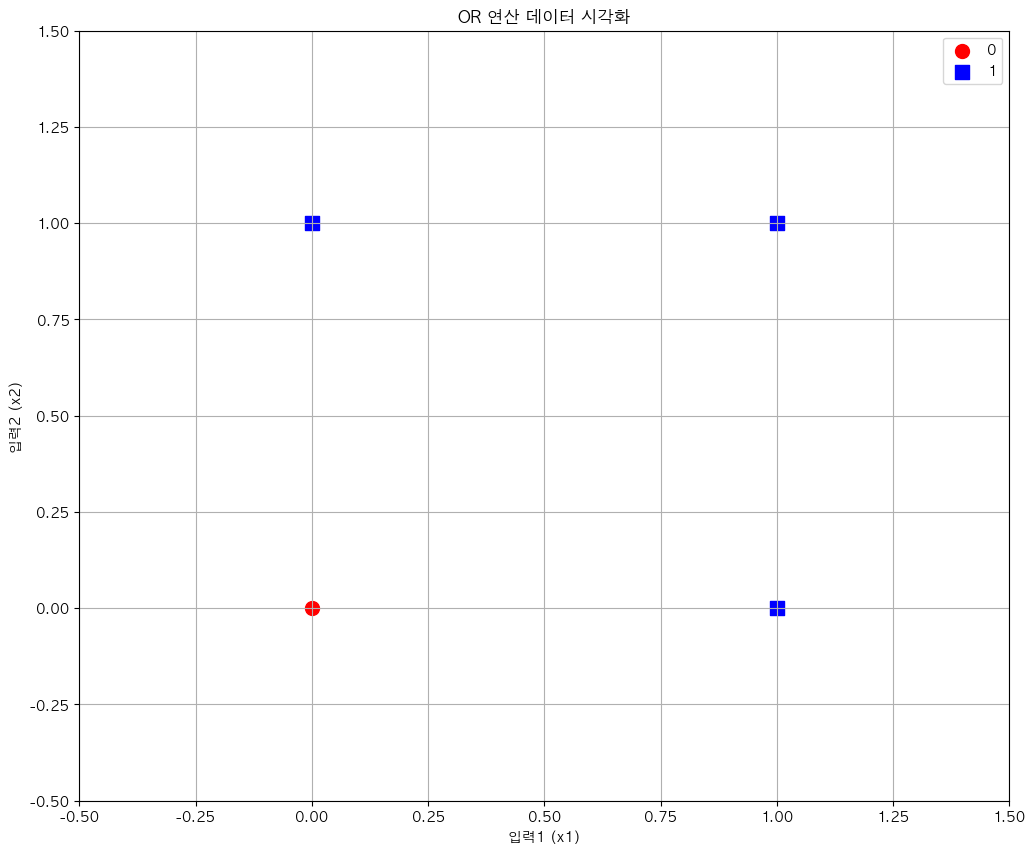

In [4]:
# 데이터 시각화
plt.figure(figsize=(12, 10))

# 산점도 그리기
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', marker='o', label='0', s=100)
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', marker='s', label='1', s=100)

plt.xlabel('입력1 (x1)')
plt.ylabel('입력2 (x2)') 
plt.title('OR 연산 데이터 시각화')
plt.legend()
plt.grid(True)

# 축 범위 설정
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)


In [5]:
# 2. Logistic Regression 모델 생성 및 훈련
print("\n2. Logistic Regression 모델 생성 및 훈련")
print("-" * 40)

# Logistic Regression 모델 생성
# max_iter를 늘려서 수렴을 보장
model = LogisticRegression(max_iter=1000, random_state=42, penalty=None)

print("Logistic Regression 모델 생성 완료")

# 모델 훈련
model.fit(X, y)
print("모델 훈련 완료")

# 모델 파라미터 확인
print(f"\n모델 파라미터:")
print(f"가중치 (weights): {model.coef_[0]}")
print(f"편향 (bias): {model.intercept_[0]}")

# 예측 수행
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)

print(f"\n예측 결과:")
print("입력1 | 입력2 | 실제값 | 예측값 | 확률(0) | 확률(1)")
print("-" * 55)
for i in range(len(X)):
    print(f"  {X[i][0]}   |   {X[i][1]}   |   {y[i]}    |   {y_pred[i]}    | {y_pred_proba[i][0]:.5f}  | {y_pred_proba[i][1]:.5f}")



2. Logistic Regression 모델 생성 및 훈련
----------------------------------------
Logistic Regression 모델 생성 완료
모델 훈련 완료

모델 파라미터:
가중치 (weights): [15.43463072 15.43463072]
편향 (bias): -7.38475424224426

예측 결과:
입력1 | 입력2 | 실제값 | 예측값 | 확률(0) | 확률(1)
-------------------------------------------------------
  0   |   0   |   0    |   0    | 0.99938  | 0.00062
  0   |   1   |   1    |   1    | 0.00032  | 0.99968
  1   |   0   |   1    |   1    | 0.00032  | 0.99968
  1   |   1   |   1    |   1    | 0.00000  | 1.00000


In [6]:
print(f"{15.43463072*1 + 15.43463072*1 -7.38475424224426}")

23.48450719775574


In [7]:
from scipy.special import expit  # 이게 sigmoid 함수!

# expit = sigmoid 함수
print(f"[0, 0]인 경우 y가 1이 될 확률: {expit(model.coef_[0][0] * 0 + model.coef_[0][1] * 0 + model.intercept_[0]):.5f}")
print(f"[0, 1]인 경우 y가 1이 될 확률: {expit(model.coef_[0][0] * 0 + model.coef_[0][1] * 1 + model.intercept_[0]):.5f}")
print(f"[1, 0]인 경우 y가 1이 될 확률: {expit(model.coef_[0][0] * 1 + model.coef_[0][1] * 0 + model.intercept_[0]):.5f}")
print(f"[1, 1]인 경우 y가 1이 될 확률: {expit(model.coef_[0][0] * 1 + model.coef_[0][1] * 1 + model.intercept_[0]):.5f}")

[0, 0]인 경우 y가 1이 될 확률: 0.00062
[0, 1]인 경우 y가 1이 될 확률: 0.99968
[1, 0]인 경우 y가 1이 될 확률: 0.99968
[1, 1]인 경우 y가 1이 될 확률: 1.00000


In [8]:
# 3. 모델 성능 평가
print("\n3. 모델 성능 평가")
print("-" * 25)

# 정확도 계산
accuracy = accuracy_score(y, y_pred)
print(f"정확도: {accuracy:.4f} ({accuracy*100:.1f}%)")

# 분류 보고서
print(f"\n분류 보고서:")
print(classification_report(y, y_pred, target_names=['Class 0', 'Class 1']))

# 혼동 행렬
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(f"\n혼동 행렬:")
print(cm)



3. 모델 성능 평가
-------------------------
정확도: 1.0000 (100.0%)

분류 보고서:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         1
     Class 1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


혼동 행렬:
[[1 0]
 [0 3]]



4. 결과 시각화
---------------


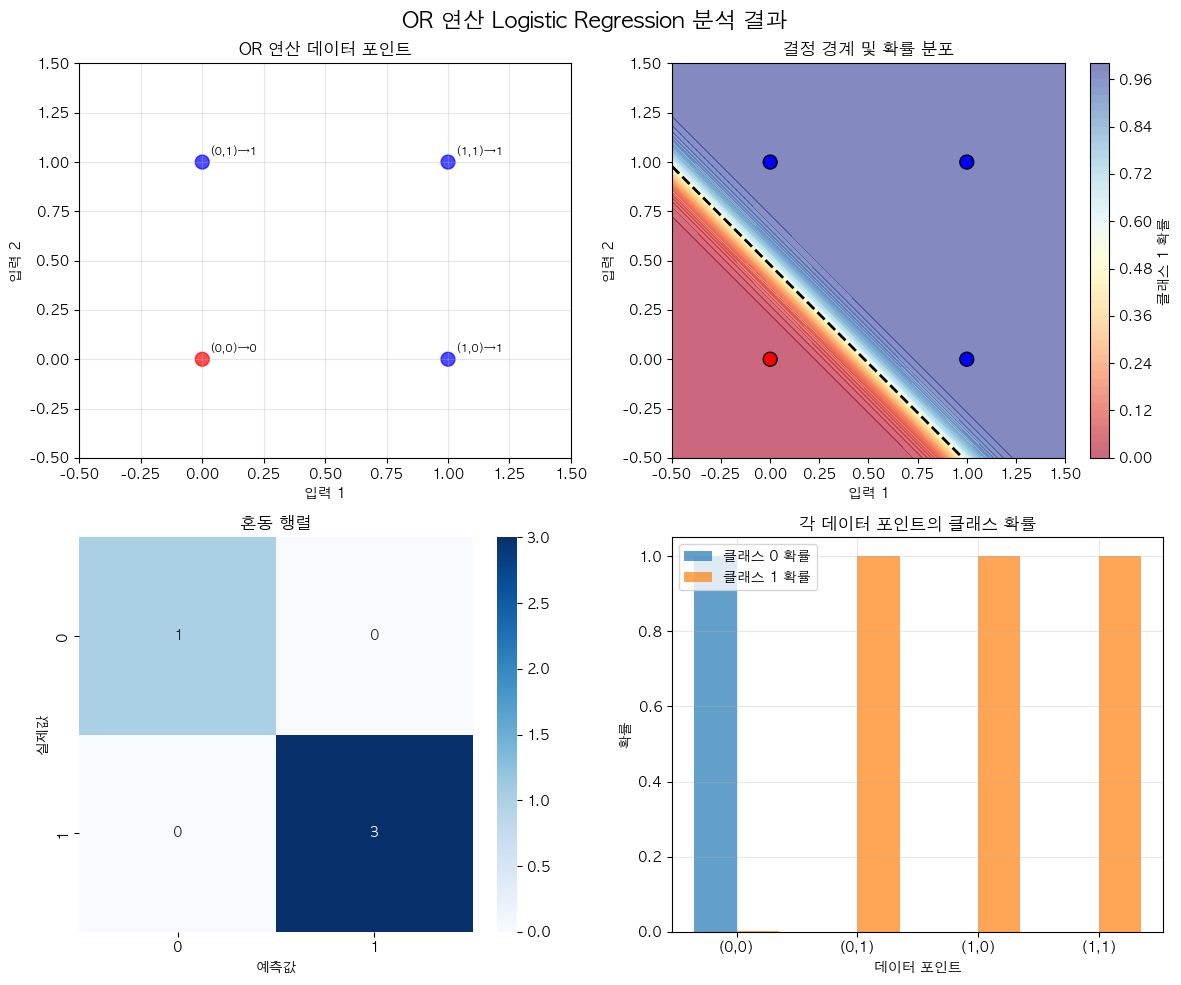

In [9]:
# 4. 결과 시각화
print("\n4. 결과 시각화")
print("-" * 15)

# 그래프 설정
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('OR 연산 Logistic Regression 분석 결과', fontsize=16, fontweight='bold')

# 1) 데이터 포인트 시각화
ax1 = axes[0, 0]
colors = ['red' if label == 0 else 'blue' for label in y]
ax1.scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.7)
ax1.set_xlabel('입력 1')
ax1.set_ylabel('입력 2')
ax1.set_title('OR 연산 데이터 포인트')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.5, 1.5)

# 데이터 포인트에 레이블 추가
for i, (x, y_val) in enumerate(zip(X, y)):
    ax1.annotate(f'({x[0]},{x[1]})→{y_val}', 
                (x[0], x[1]), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8)

# 2) 결정 경계 시각화
ax2 = axes[0, 1]
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100),
                     np.linspace(-0.5, 1.5, 100))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict_proba(mesh_points)[:, 1]
Z = Z.reshape(xx.shape)

contour = ax2.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
ax2.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)
ax2.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolors='black')
ax2.set_xlabel('입력 1')
ax2.set_ylabel('입력 2')
ax2.set_title('결정 경계 및 확률 분포')
plt.colorbar(contour, ax=ax2, label='클래스 1 확률')

# 3) 혼동 행렬 히트맵
ax3 = axes[1, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax3)
ax3.set_xlabel('예측값')
ax3.set_ylabel('실제값')
ax3.set_title('혼동 행렬')

# 4) 확률 분포 막대 그래프
ax4 = axes[1, 1]
x_pos = np.arange(len(X))
width = 0.35
ax4.bar(x_pos - width/2, y_pred_proba[:, 0], width, label='클래스 0 확률', alpha=0.7)
ax4.bar(x_pos + width/2, y_pred_proba[:, 1], width, label='클래스 1 확률', alpha=0.7)
ax4.set_xlabel('데이터 포인트')
ax4.set_ylabel('확률')
ax4.set_title('각 데이터 포인트의 클래스 확률')
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f'({X[i][0]},{X[i][1]})' for i in range(len(X))])
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [12]:
# 5. 수동 구현 Logistic Regression (학습 목적)
print("\n5. 수동 구현 Logistic Regression")
print("-" * 35)

class ManualLogisticRegression:
    def __init__(self, learning_rate=0.1, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.costs = []
    
    def sigmoid(self, z):
        """시그모이드 활성화 함수"""
        # 오버플로우 방지
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """모델 훈련"""
        # 가중치와 편향 초기화
        n_features = X.shape[1]
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0
        
        # 경사하강법으로 훈련
        for i in range(self.max_iterations):
            # 순전파 (Feed Forward)
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            
            # 비용 계산 (로그 손실)
            cost = -np.mean(y * np.log(predictions + 1e-15) + 
                           (1 - y) * np.log(1 - predictions + 1e-15))
            self.costs.append(cost)
            
            # X * E(그래디언트) 계산
            dw = np.dot(X.T, (predictions - y)) / len(y)
            db = np.mean(predictions - y)
            
            # 가중치 업데이트
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict_proba(self, X):
        """확률 예측"""
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def predict(self, X):
        """클래스 예측"""
        return (self.predict_proba(X) >= 0.5).astype(int)

# 수동 구현 모델 훈련
manual_model = ManualLogisticRegression(learning_rate=1.0, max_iterations=1000)
manual_model.fit(X, y)

# 예측 수행
manual_pred = manual_model.predict(X)
manual_pred_proba = manual_model.predict_proba(X)

print(f"수동 구현 모델 파라미터:")
print(f"가중치: {manual_model.weights}")
print(f"편향: {manual_model.bias}")

print(f"\n수동 구현 예측 결과:")
print("입력1 | 입력2 | 실제값 | 예측값 | 확률")
print("-" * 40)
for i in range(len(X)):
    print(f"  {X[i][0]}   |   {X[i][1]}   |   {y[i]}    |   {manual_pred[i]}    | {manual_pred_proba[i]:.3f}")

# 정확도 비교
manual_accuracy = accuracy_score(y, manual_pred)
print(f"\nScikit-learn 모델 정확도: {accuracy:.4f}")
print(f"수동 구현 모델 정확도: {manual_accuracy:.4f}")



5. 수동 구현 Logistic Regression
-----------------------------------
수동 구현 모델 파라미터:
가중치: [8.66395835 8.6639605 ]
편향: -3.8668298841415636

수동 구현 예측 결과:
입력1 | 입력2 | 실제값 | 예측값 | 확률
----------------------------------------
  0   |   0   |   0    |   0    | 0.020
  0   |   1   |   1    |   1    | 0.992
  1   |   0   |   1    |   1    | 0.992
  1   |   1   |   1    |   1    | 1.000

Scikit-learn 모델 정확도: 1.0000
수동 구현 모델 정확도: 1.0000



6. 학습 과정 시각화
--------------------


/var/folders/rb/qh6lstqx6_x1zhdc_b0z8h840000gn/T/ipykernel_89679/211914459.py:26: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_sklearn, levels=[0.5], colors='blue', linestyles='-', linewidths=2, label='Scikit-learn')
/var/folders/rb/qh6lstqx6_x1zhdc_b0z8h840000gn/T/ipykernel_89679/211914459.py:27: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_manual, levels=[0.5], colors='red', linestyles='--', linewidths=2, label='수동 구현')
/var/folders/rb/qh6lstqx6_x1zhdc_b0z8h840000gn/T/ipykernel_89679/211914459.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


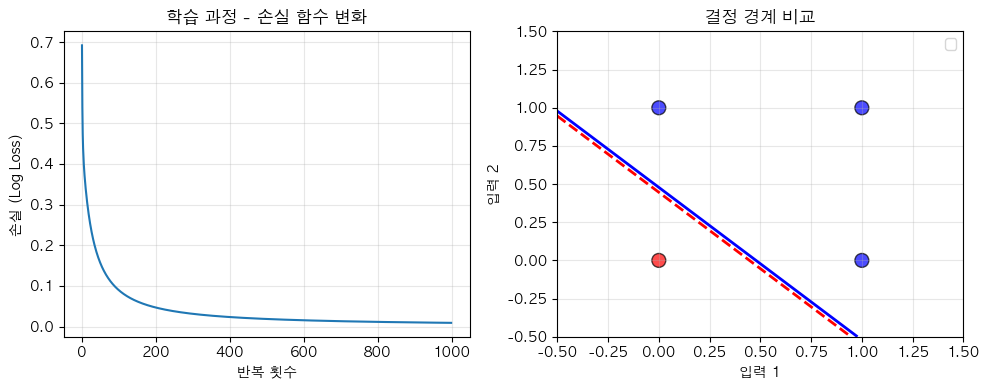


OR 연산 Logistic Regression 분석 완료!
✓ OR 연산 진리표를 완벽하게 학습했습니다.
✓ Scikit-learn 모델 정확도: 100.0%
✓ 수동 구현 모델 정확도: 100.0%
✓ 두 모델 모두 OR 연산을 정확히 분류합니다!

주요 특징:
- OR 연산은 선형 분리 가능한 문제입니다
- 단일 직선으로 클래스를 완벽히 구분할 수 있습니다
- (0,0) → 0, 나머지 모든 조합 → 1
- Logistic Regression이 이런 간단한 논리 게이트에 적합합니다


In [11]:
# 6. 학습 과정 시각화
print("\n6. 학습 과정 시각화")
print("-" * 20)

# 학습 곡선 그래프
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(manual_model.costs)
plt.title('학습 과정 - 손실 함수 변화')
plt.xlabel('반복 횟수')
plt.ylabel('손실 (Log Loss)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# 최종 결정 경계 비교
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100),
                     np.linspace(-0.5, 1.5, 100))
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Scikit-learn 모델
Z_sklearn = model.predict_proba(mesh_points)[:, 1].reshape(xx.shape)
# 수동 구현 모델  
Z_manual = manual_model.predict_proba(mesh_points).reshape(xx.shape)

plt.contour(xx, yy, Z_sklearn, levels=[0.5], colors='blue', linestyles='-', linewidths=2, label='Scikit-learn')
plt.contour(xx, yy, Z_manual, levels=[0.5], colors='red', linestyles='--', linewidths=2, label='수동 구현')
plt.scatter(X[:, 0], X[:, 1], c=['red' if label == 0 else 'blue' for label in y], 
           s=100, edgecolors='black', alpha=0.7)
plt.xlabel('입력 1')
plt.ylabel('입력 2')
plt.title('결정 경계 비교')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 최종 요약
print("\n" + "="*50)
print("OR 연산 Logistic Regression 분석 완료!")
print("="*50)
print(f"✓ OR 연산 진리표를 완벽하게 학습했습니다.")
print(f"✓ Scikit-learn 모델 정확도: {accuracy*100:.1f}%")
print(f"✓ 수동 구현 모델 정확도: {manual_accuracy*100:.1f}%")
print(f"✓ 두 모델 모두 OR 연산을 정확히 분류합니다!")

print(f"\n주요 특징:")
print(f"- OR 연산은 선형 분리 가능한 문제입니다")
print(f"- 단일 직선으로 클래스를 완벽히 구분할 수 있습니다")
print(f"- (0,0) → 0, 나머지 모든 조합 → 1")
print(f"- Logistic Regression이 이런 간단한 논리 게이트에 적합합니다")
